In [ ]:
'''
                                     MA374 | Lab 08
                        Deepak Kumar Gouda | 160123054
'''

In [1]:
import numpy as np
from numpy import exp,log
from matplotlib import pyplot as plt

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

In [3]:
def getVasicekYield(a, b, sigma, r, time_steps):
    y = np.zeros(time_steps+1)
    y[0] = r
    for T in range(1,time_steps+1):
        B = (1-exp(-a*T))/a
        A = (B-T)*(a*b-0.5*sigma**2)/(a**2)-((a*B)**2)/(4*a) 
        p = exp(A-B*r) 
        y[T] = -1*log(p)/T
    return y

In [4]:
def getCIRYield(a,b,sigma,r,time_steps):
    y = np.zeros(time_steps+1) 
    y[0] = r
    gamma = ((a)**2+2*(sigma**2))**0.5
    for T in range(1,time_steps+1):
        D = ((gamma+a)*(exp(gamma*T)-1)+2*gamma)
        B = 2*(exp(gamma*T)-1)/D
        A = (2*gamma*exp((a+gamma)*(T/2))/D)**(2*a*b/(sigma**2))
        
        p = A*exp(-B*r)
        y[T] = -1*log(p)/T
    return y

In [5]:
def getYieldPlot(model):
    if model is 'Vasicek':
        set1 = [5.9, 0.2, 0.3, 0.1,'blue']
        set2 = [3.9, 0.1, 0.3, 0.2,'orange']
        set3 = [0.1, 0.4, 0.11, 0.1,'green']
    else:
        set1 = [0.02, 0.7, 0.02, 0.1,'blue']
        set2 = [0.7, 0.1, 0.3, 0.2,'orange']
        set3 = [0.06, 0.09, 0.5, 0.02,'green']
    sets = [set1, set2, set3]
    time_steps = 10
    plt.figure()

    for set0 in sets:
        beta, mu,sigma,r,col = set0
        a = beta
        b = beta * mu
        if model is 'Vasicek':
            y = getVasicekYield(a,b,sigma,r,time_steps)
        elif model is 'CIR':
            y = getCIRYield(a,b,sigma,r,time_steps)
        plt.plot(y,color=col, label=set0[:-1])
    plt.title(model+' Model')
    plt.xlabel('T')
    plt.ylabel('Yield')
    plt.legend()
    plt.show()

    if model is 'CIR':
        sets=[[0.02, 0.7, 0.02, 'orange']]
        time_steps=600
    else:
        time_steps=500
        
    for set0 in sets:
        plt.figure()
        for r1 in np.arange(0,1.1,0.1):
            if model is 'Vasicek':
                beta, mu, sigma, r, col = set0
            else:
                beta, mu, sigma, col = set0
            a = beta
            b = beta * mu
            if model is 'Vasicek':
                y = getVasicekYield(a,b,sigma,r1,time_steps)
            elif model is 'CIR':
                y = getCIRYield(a,b,sigma,r1,time_steps)

            plt.plot(y,color=col)
        plt.title(model+" Model with beta, mu,sigma = "+str(set0[:-2])+" r = 0.1 to 1")
        plt.xlabel('T')
        plt.ylabel('Yield')
        plt.show()

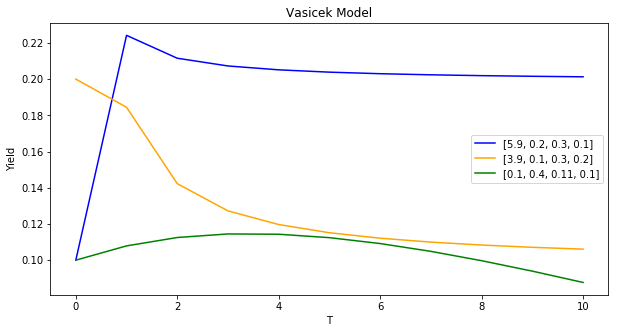

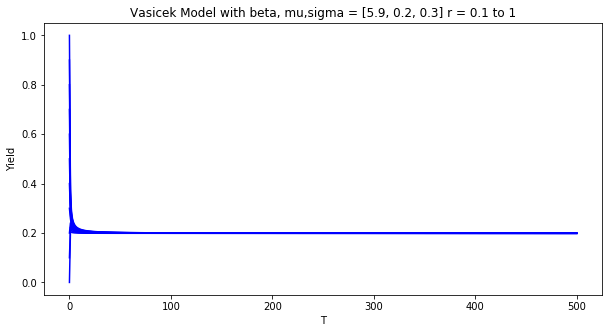

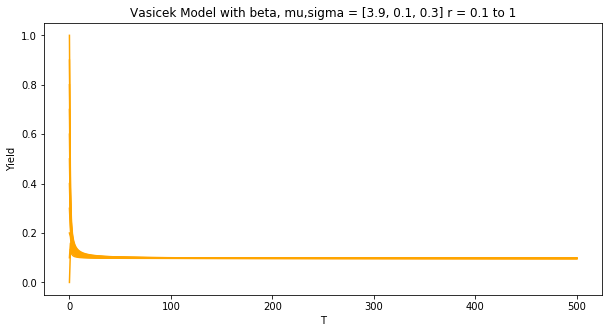

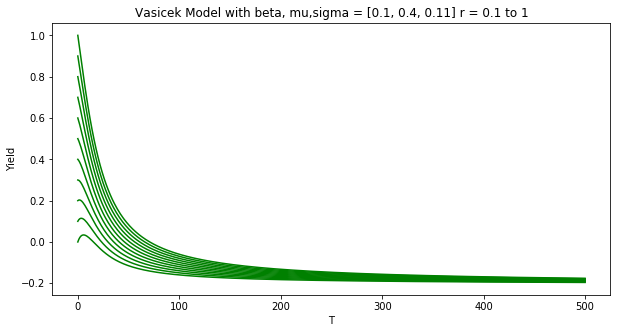

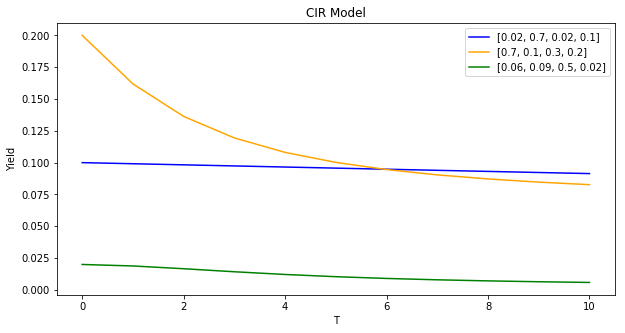

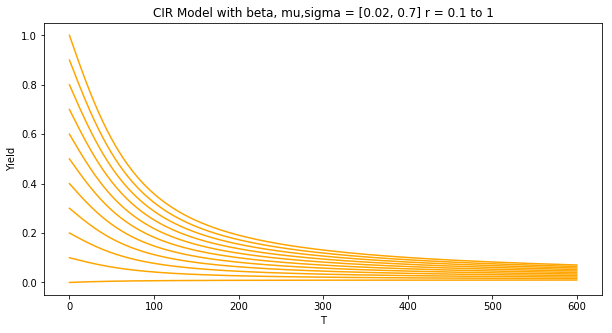

In [6]:
getYieldPlot('Vasicek')
getYieldPlot('CIR')